<a href="https://colab.research.google.com/github/eaeschl/Android_GPS_23_06_2021/blob/main/Introdu%C3%A7%C3%A3o_ao_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

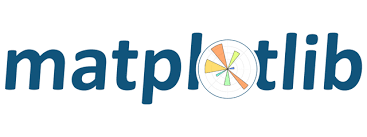

# Matplotlib

- É a mais famosa biblioteca para criação, visualização e manipulação de gráficos em Python
- É dependente do `numpy` como principal formato de entrada de dados, mas até certo nível, a dependência é quase transparente ao usuário.

## Exemplos

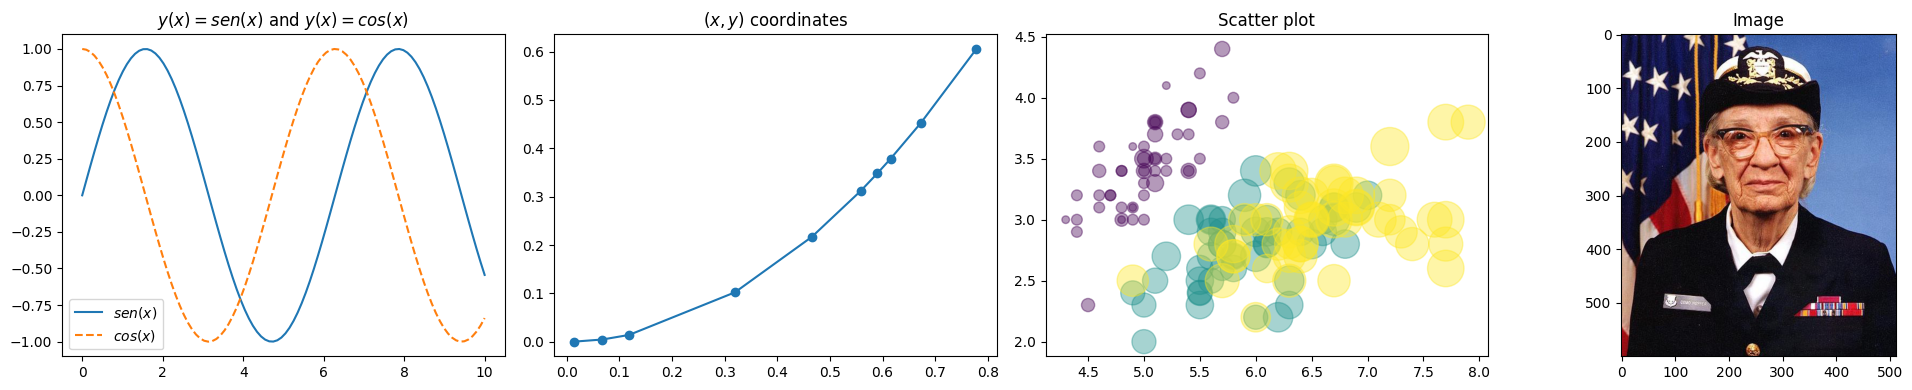

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4]
plt.rcParams['figure.dpi'] = 100 

fig, ax = plt.subplots(1, 4, tight_layout=True)

# grafico simples
x = np.linspace(0, 10, 100)
ax[0].plot(x, np.sin(x), '-', label="$sen(x)$")
ax[0].plot(x, np.cos(x), '--', label="$cos(x)$");
ax[0].set_title("$y(x) = sen(x)$ and $y(x) = cos(x)$")
ax[0].legend()

# grafico a partir de pontos
x = np.sort(np.random.uniform(0,1,10))
y = x**2
ax[1].plot(x, y, 'o-');
ax[1].set_title("$(x,y)$ coordinates")

# scatter plot
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
ax[2].scatter(features[0], features[1], alpha=0.4, s=300*features[3], c=iris.target);
ax[2].set_title("Scatter plot")

# imagem
import matplotlib.cbook as cbook

with cbook.get_sample_data('grace_hopper.png') as image_file:
    image = plt.imread(image_file)

ax[3].imshow(image);
ax[3].set_title("Image");

### Gráficos 3D

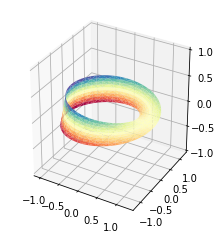

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri


fig = plt.figure(figsize=plt.figaspect(0.5))

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1);

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 ;


# Um gráfico simples

- Todo gráfico, em 2D, é um conjunto de pontos (coordenadas) $(x,y)$.
- Gráfico (plot) dos pontos abaixo.

| x | y  |
|---|----|
| 1 | 4  |
| 2 | 10 |
| 3 | 11 |
| 4 | 7  |
| 5 | 5  |

### Método simples (um plot)

1a. etapa - Importar o numpy e o matplotlib.pyplot (**apenas uma vez por sessão**).

- O **NumPy** é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais. Possibilita a manipulação de dados de máneira eficiente. Os dados são passados ao Matplotlib como arrays do Numpy.
- O **matplotlib.pyplot** é um conjunto de funções que permite fazer o **Matplotlib** funcionar como o **MATLAB** (software comercial para matemática computacional).
  - É o método quase padrão para utilizar o **Matplotlib**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2a. etapa - Definir os dados a serem plotados.

In [ ]:
x = [1, 2, 3, 4, 5]
y = [4, 10, 11, 7, 5]

3a. etapa - Plotar!

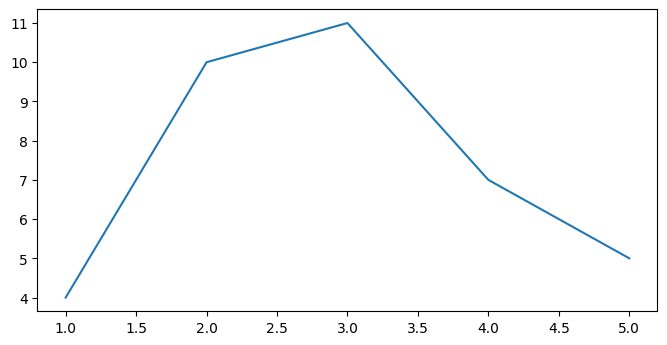

In [ ]:
plt.plot(x, y);

Um código equivalente seria: 

```python
import numpy as np
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [4, 10, 11, 7, 5]
plt.plot(x, y);
```


- O *format* `fmt` é uma maneira conveniente de passar a formatação do plot em uma string.

`format = '[marker][line][color]'`


[matplotlib - docs](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html)

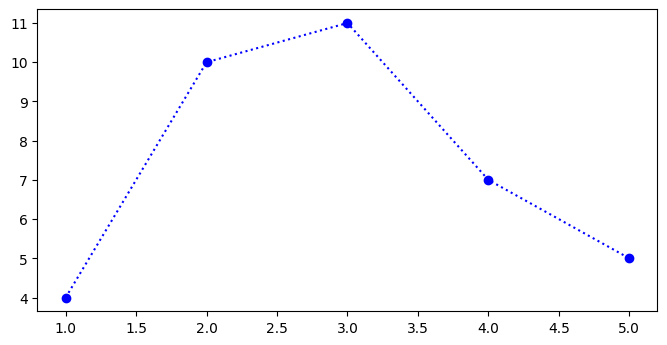

In [ ]:
plt.plot(x, y, 'o:b');

### Desafio

Plotar um conjunto de dados (5 elementos quaisquer), sendo que: y é o dobro de x.

Os marcadores deverão ser estrelas, as linhas pontilhadas e verdes.

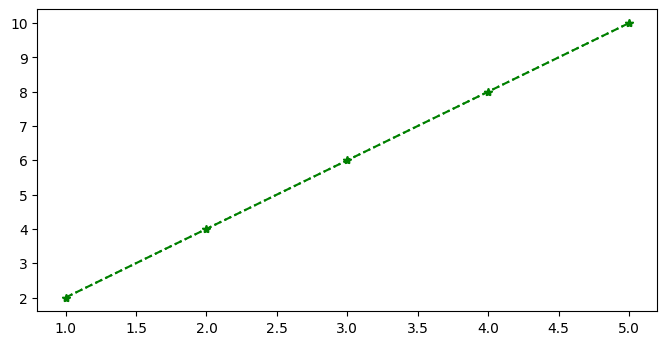

In [ ]:
# coloque sua resposta aqui
x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.plot(x, y, '*:g');
plt.plot(x, y, '*--g');

#### Resposta

```python
x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.plot(x, y, '*--g');
```

### Operações matemáticas (simples) com Numpy

- O Numpy permitiria resolver o Desafio anterior de maneira mais simples.


ValueError: ignored

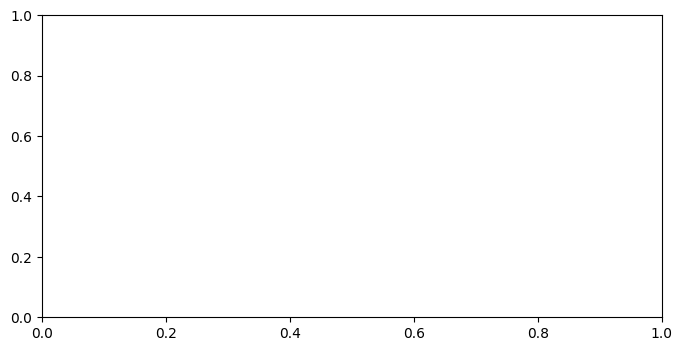

In [ ]:
# Não deve funcionar

x = [1,2,3,4,5]
plt.plot(x, x*2, '*--g');

# x é um `list`. O Python entende operações matemática (exemplo: *2) em `lists`.


Solução para operações matemáticas com arrays: Numpy.

- Vamos converter x de **list** para **numpy.array**.
- Isso permitirá fazer operações matemáticas com os elemento do **numpy.array**.

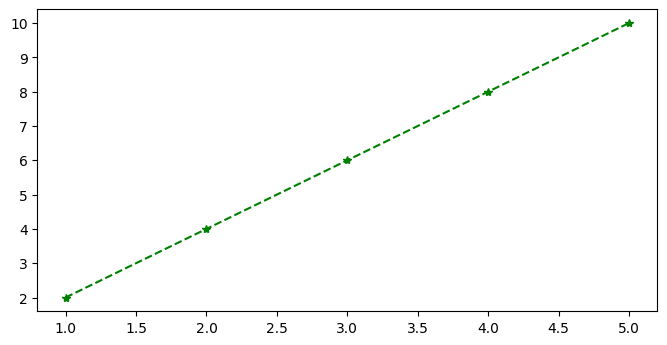

In [ ]:
x = np.array([1,2,3,4,5])
plt.plot(x, x*2, '*--g');

Documetação do Numpy: https://numpy.org/doc/stable/

## Explorando o matplotlib.pyplot

### Mais de uma plot na mesma figura

- Quando fazemos `plt.plot(...)`, duas coisas acontecem por baixo dos panos:
  - Uma figura é criada.
  - Um par de eixos (x,y) é criado dentro da figura.
- Criar a figura e os eixos por conta própria te dá mais liberdade para explorar o pyplot.

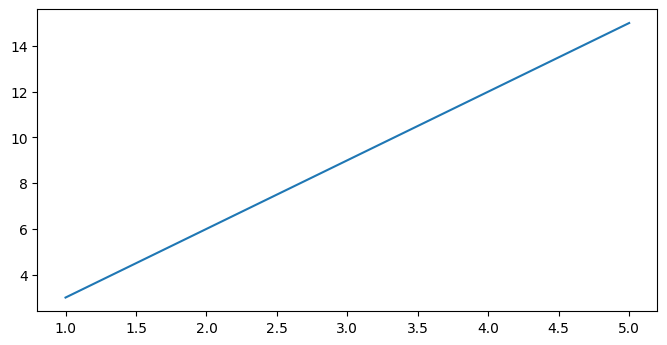

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# plot
ax.plot(x,3*x);

Mais um plot compartilhando os mesmo eixos:

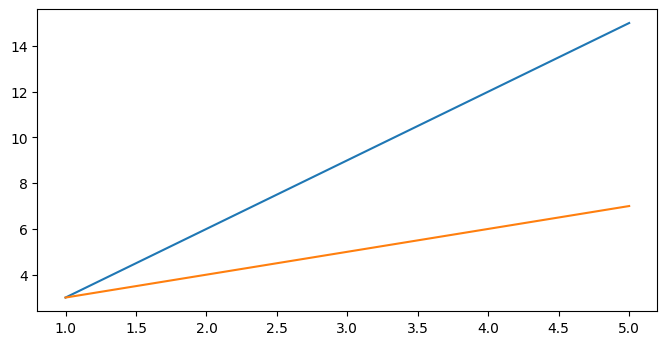

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# 2 plots nos mesmos eixos
ax.plot(x,3*x)
ax.plot(x,x+2);

Melhor adicionar uma legenda...

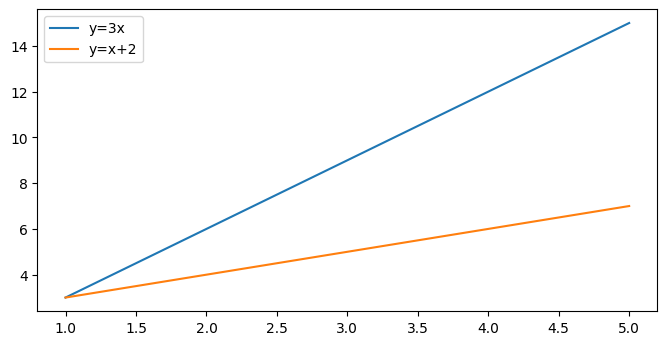

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# 2 plots nos mesmos eixos
ax.plot(x,3*x, label='y=3x')
ax.plot(x,x+2, label='y=x+2');

ax.legend();


#### Podemos adicionar uma grid ao gráfico...

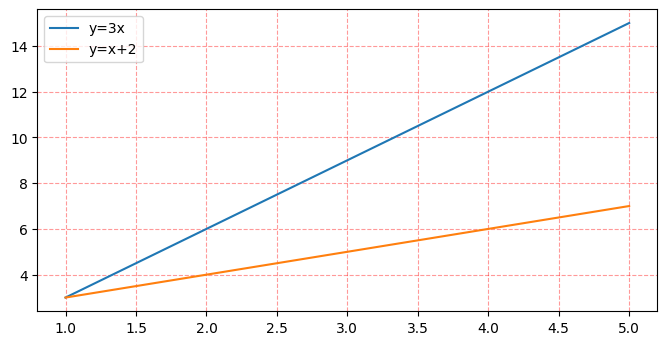

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# 2 plots nos mesmos eixos
ax.plot(x,3*x, label='y=3x')
ax.plot(x,x+2, label='y=x+2');

ax.legend()

ax.grid(c='r', alpha=0.4, linestyle='--');



Quem sabe um título...

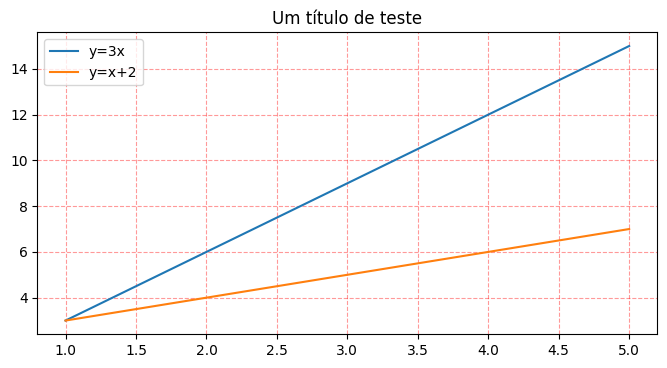

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# 2 plots nos mesmos eixos
ax.plot(x,3*x, label='y=3x')
ax.plot(x,x+2, label='y=x+2');

ax.legend()

ax.grid(c='r', alpha=0.4, linestyle='--')

ax.set_title("Um título de teste");

Um nome para x e y...

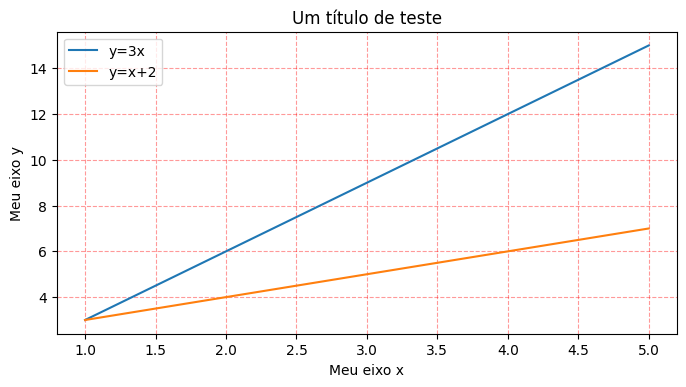

In [ ]:
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura

# dados
x = np.array([1,2,3,4,5])

# 2 plots nos mesmos eixos
ax.plot(x,3*x, label='y=3x')
ax.plot(x,x+2, label='y=x+2');

ax.legend()

ax.grid(c='r', alpha=0.4, linestyle='--')

plt.title("Um título de teste")

ax.set_xlabel("Meu eixo x")
ax.set_ylabel("Meu eixo y");

### Anatomia de uma figura

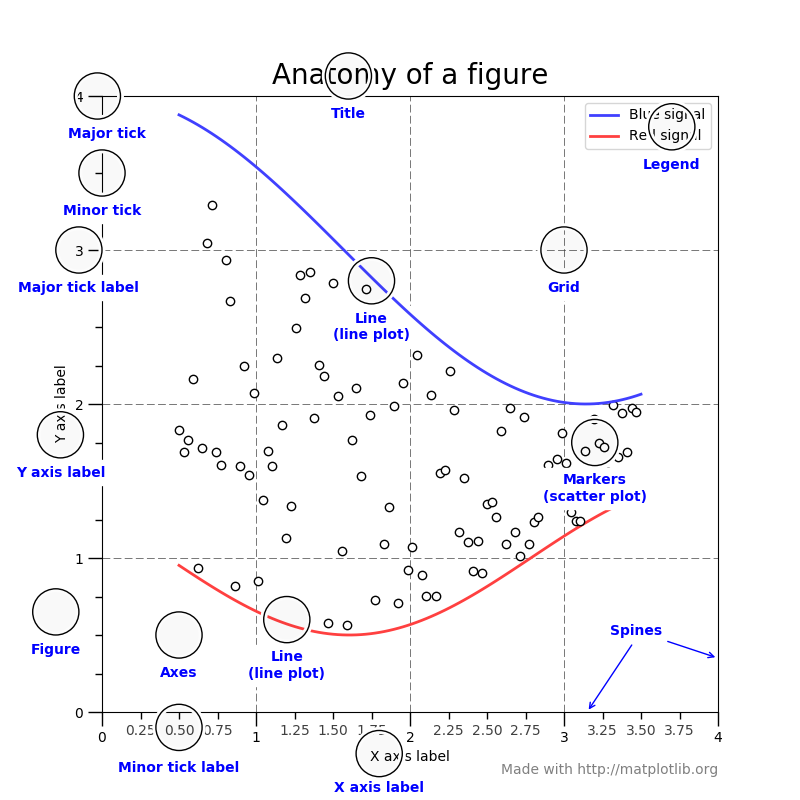

#### Desafio

Faça um gráfico da temperatura média por ano, para as cidades de Manaus, Porto Alegre e São Paulo. 

Dados: http://en.tutiempo.net/climate

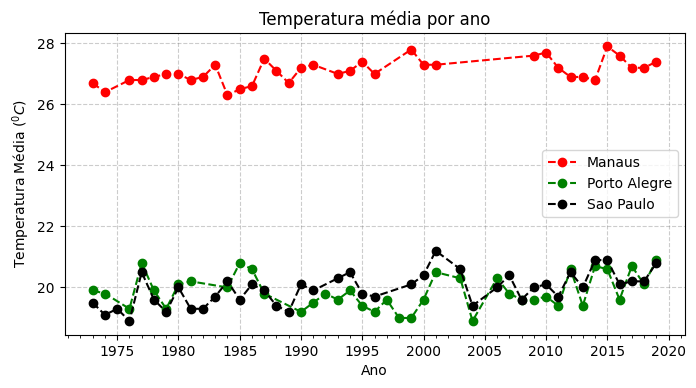


```python
ano_manaus = [1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1999, 2000, 2001, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_manaus = [26.7, 26.4, 26.8, 26.8, 26.9, 27.0, 27.0, 26.8, 26.9, 27.3, 26.3, 26.5, 26.6, 27.5, 27.1, 26.7, 27.2, 27.3, 27.0, 27.1, 27.4, 27.0, 27.8, 27.3, 27.3, 27.6, 27.7, 27.2, 26.9, 26.9, 26.8, 27.9, 27.6, 27.2, 27.2, 27.4]

ano_porto_alegre = [1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1984, 1985, 1986, 1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_porto_alegre = [19.9, 19.8, 19.3, 20.8, 19.9, 19.3, 20.1, 20.2, 20.0, 20.8, 20.6, 19.8, 19.2, 19.5, 19.8, 19.6, 19.9, 19.4, 19.2, 19.6, 19.0, 19.0, 19.6, 20.5, 20.3, 18.9, 20.3, 19.8, 19.6, 19.6, 19.7, 19.4, 20.6, 19.4, 20.7, 20.6, 19.6, 20.7, 20.1, 20.9]

ano_sao_paulo = [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_sao_paulo = [19.5, 19.1, 19.3, 18.9, 20.5, 19.6, 19.2, 20.0, 19.3, 19.3, 19.7, 20.2, 19.6, 20.1, 19.9, 19.4, 19.2, 20.1, 19.9, 20.3, 20.5, 19.8, 19.7, 20.1, 20.4, 21.2, 20.6, 19.4, 20.0, 20.4, 19.6, 20.0, 20.1, 19.7, 20.5, 20.0, 20.9, 20.9, 20.1, 20.2, 20.2, 20.8]
```

In [ ]:
# coloque sua resposta aqui

#### Resposta

```python
fig = plt.figure() # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
# dados
ano_manaus = [1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1999, 2000, 2001, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_manaus = [26.7, 26.4, 26.8, 26.8, 26.9, 27.0, 27.0, 26.8, 26.9, 27.3, 26.3, 26.5, 26.6, 27.5, 27.1, 26.7, 27.2, 27.3, 27.0, 27.1, 27.4, 27.0, 27.8, 27.3, 27.3, 27.6, 27.7, 27.2, 26.9, 26.9, 26.8, 27.9, 27.6, 27.2, 27.2, 27.4]
 
ano_porto_alegre = [1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1984, 1985, 1986, 1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_porto_alegre = [19.9, 19.8, 19.3, 20.8, 19.9, 19.3, 20.1, 20.2, 20.0, 20.8, 20.6, 19.8, 19.2, 19.5, 19.8, 19.6, 19.9, 19.4, 19.2, 19.6, 19.0, 19.0, 19.6, 20.5, 20.3, 18.9, 20.3, 19.8, 19.6, 19.6, 19.7, 19.4, 20.6, 19.4, 20.7, 20.6, 19.6, 20.7, 20.1, 20.9]
 
ano_sao_paulo = [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
temperatura_sao_paulo = [19.5, 19.1, 19.3, 18.9, 20.5, 19.6, 19.2, 20.0, 19.3, 19.3, 19.7, 20.2, 19.6, 20.1, 19.9, 19.4, 19.2, 20.1, 19.9, 20.3, 20.5, 19.8, 19.7, 20.1, 20.4, 21.2, 20.6, 19.4, 20.0, 20.4, 19.6, 20.0, 20.1, 19.7, 20.5, 20.0, 20.9, 20.9, 20.1, 20.2, 20.2, 20.8]
 
# 2 plots nos mesmos eixos
ax.plot(ano_manaus,temperatura_manaus, 'o--r', label='Manaus')
ax.plot(ano_porto_alegre,temperatura_porto_alegre, 'o--g', label='Porto Alegre')
ax.plot(ano_sao_paulo,temperatura_sao_paulo, 'o--k', label='Sao Paulo')
 
ax.legend()
 
ax.grid(c='gray', alpha=0.4, linestyle='--')
 
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
 
plt.title("Temperatura média por ano")
 
ax.set_xlabel("Ano")
ax.set_ylabel("Temperatura Média (${}^{0}C$)");
```

### Vários plots na mesma figura

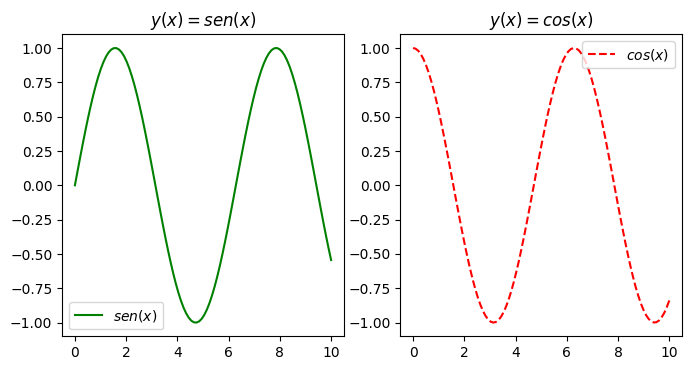

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)

# grafico 1
x = np.linspace(0, 10, 100)
ax[0].plot(x, np.sin(x), 'g-', label="$sen(x)$")
ax[0].set_title("$y(x) = sen(x)$")
ax[0].legend()

# grafico 2
x = np.linspace(0, 10, 100)
ax[1].plot(x, np.cos(x), 'r--', label="$cos(x)$");
ax[1].set_title("$y(x) = cos(x)$")
ax[1].legend();



AttributeError: ignored

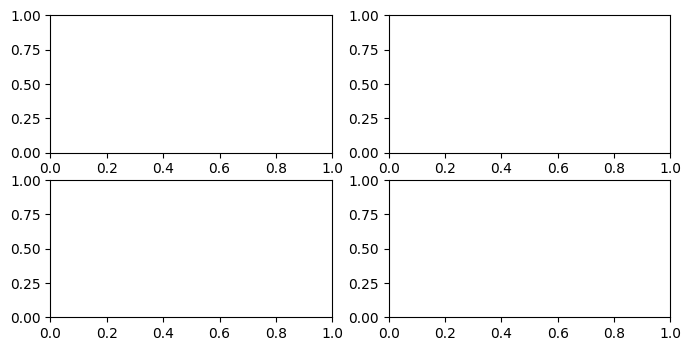

In [ ]:
fig, ax = plt.subplots(2, 2),fig.size(14,12)

# grafico 1
x = np.linspace(0, 10, 100)
ax[0][0].plot(x, np.sin(x), 'g-', label="$sen(x)$")
ax[0][0].set_title("$y(x) = sen(x)$")
ax[0][0].legend()

# grafico 2
x = np.linspace(0, 10, 100)
ax[1][1].plot(x, np.cos(x), 'r--', label="$cos(x)$");
ax[1][1].set_title("$y(x) = cos(x)$")
ax[1][1].legend();